Import stuff

In [2]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Call an instance of the extented HANC model (Maybe rename the model class at some point)

In [152]:
model = HANCModelClass(name='model')

Print to see whatever is in 'model'

In [153]:
print(model)

Modelclass: HANCModelClass
Name: model

namespaces: ['sol', 'sim', 'path', 'par', 'ss', 'ini']
other_attrs: ['par', 'ini', 'ss', 'path', 'sim', 'grids_hh', 'pols_hh', 'inputs_hh', 'inputs_hh_z', 'outputs_hh', 'intertemps_hh', 'shocks', 'unknowns', 'targets', 'varlist', 'jac', 'H_U', 'H_Z', 'jac_hh', 'IRF']
savefolder: saved
cpp_filename: None

sol:
 memory, gb: 0.0

sim:
 a = ndarray with shape = (1000, 2, 14, 500) [dtype: float64]
 A_hh_from_D = ndarray with shape = (1000,) [dtype: float64]
 z_trans = ndarray with shape = (1000, 2, 14, 14) [dtype: float64]
 Dz = ndarray with shape = (1000, 2, 14) [dtype: float64]
 D = ndarray with shape = (1000, 2, 14, 500) [dtype: float64]
 Dbeg = ndarray with shape = (1000, 2, 14, 500) [dtype: float64]
 pol_indices = ndarray with shape = (1000, 2, 14, 500) [dtype: int32]
 pol_weights = ndarray with shape = (1000, 2, 14, 500) [dtype: float64]
 dY = ndarray with shape = (1000,) [dtype: float64]
 dC = ndarray with shape = (1000,) [dtype: float64]
 dI =

Find the initial steady state. Write parameter values used (at least for the ones at vary later).
**This takes a few seconds**

In [154]:
model.find_ss(do_print=True)

it
it
it
it
it
it
it
it
it
it
it
it
it
it
Solver terminated
it

Steady state aggregates:
 K_ss =   3.4188
 L_ss =   1.0120
 Y_ss =   1.4581
 G_ss =   0.3000
 B_ss =   0.6266
 I_ss =   0.3419
 C_ss =   0.8163

steady state prices:
 w_ss =   1.0086
 r_ss =   0.0280

Check for market clearing:
Excess savings           = -0.0000
Exess consumption demand = -0.0000
Excess labour supply     =  0.0000


In [144]:
model.solve_hh_ss()

In [145]:
ss = model.ss
par = model.par

### Illustrate HH behavior

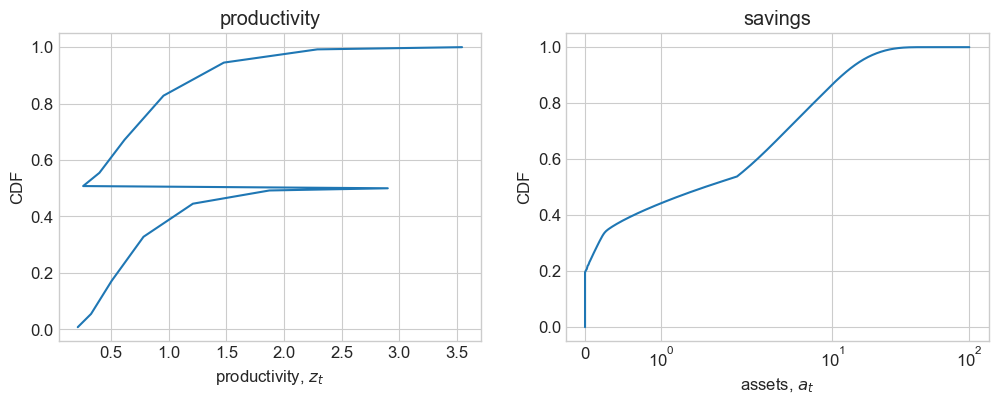

In [155]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')
ax.plot(par.z_grid,np.cumsum(np.sum(ss.D,axis=(0,2))))

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),np.insert(np.cumsum(np.sum(ss.D,axis=(0,1))),0,0.0),label='discrete')
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

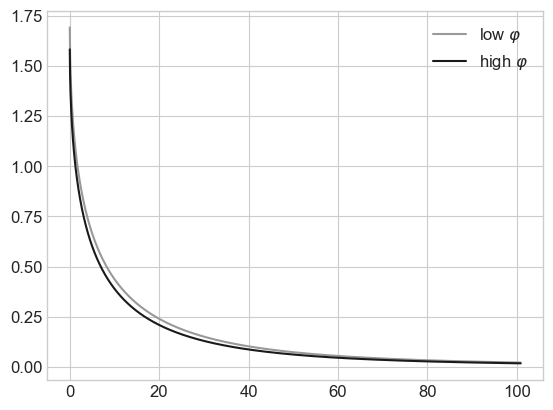

In [156]:
plt.plot(par.a_grid,ss.ell[0,1,:], color = '0.6', label = r'low $\varphi$')
plt.plot(par.a_grid,ss.ell[1,1,:], color = '0.1', label = r'high $\varphi$')
plt.legend()

plt.show()

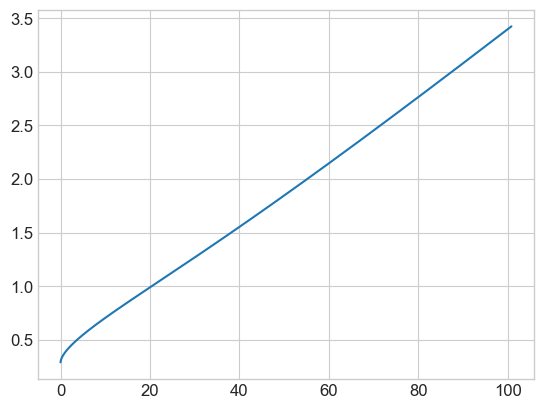

In [157]:
plt.plot(par.a_grid, ss.c[0,0,:])

In [158]:
par.beta*(1+ss.r)

0.9868341320069888